In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [11]:
df = pd.read_excel("Enquesta P.E._respostes.xlsx")
df =df.drop('Unnamed: 0', axis=1)
df.rename(columns={'Hores son': 'son_correcte'},inplace = True)

In [12]:
df

,hores_estudi,hores_son,dies_esport,nota,son_correcte
0,5.5,7.5,4.0,4.25,1
1,3.0,9.0,2.0,5.50,1
2,1.0,7.0,2.0,7.85,1
3,1.0,8.0,0.0,7.00,1
4,4.5,7.5,2.0,7.00,1
...,...,...,...,...,...
95,5.0,8.0,2.0,9.12,1
96,4.0,7.0,3.0,8.40,1
97,2.0,6.5,4.0,6.64,0
98,5.0,8.0,4.0,9.85,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hores_estudi  100 non-null    float64
 1   hores_son     100 non-null    float64
 2   dies_esport   100 non-null    float64
 3   nota          100 non-null    float64
 4   son_correcte  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [14]:
df.describe()

,hores_estudi,hores_son,dies_esport,nota,son_correcte
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.070000,7.008000,2.695000,6.533220,0.500000
std,2.330106,1.380267,1.629735,1.545393,0.502519
min,0.000000,2.000000,0.000000,2.000000,0.000000
25%,2.000000,6.000000,2.000000,5.657500,0.000000
50%,2.250000,7.000000,3.000000,6.450000,0.500000
75%,4.000000,8.000000,4.000000,7.562500,1.000000
max,12.000000,12.000000,7.000000,9.850000,1.000000


In [15]:
df_no_son = df.drop(df[df['son_correcte']==True].index)
df_son = df.drop(df[df['son_correcte']==False].index)

Nombre d'estudiants son correcte: 50
Nombre d'estudiants son no correcte: 50


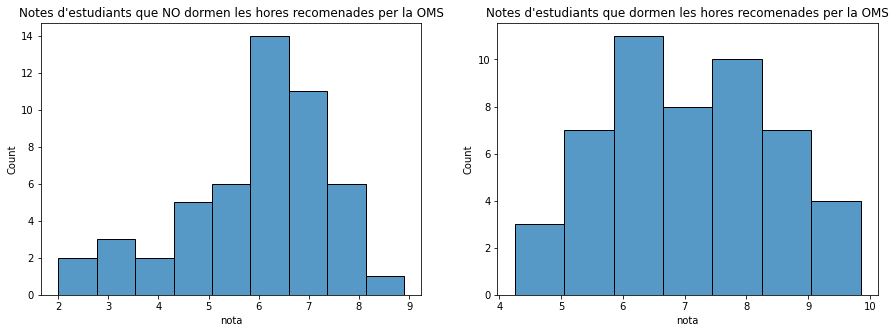

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15,5)) 
sns.histplot(ax=ax[0],data = df_no_son, x="nota",legend=True).set(title="Notes d'estudiants que NO dormen les hores recomenades per la OMS")
sns.histplot(ax=ax[1],data = df_son, x="nota",legend=True).set(title="Notes d'estudiants que dormen les hores recomenades per la OMS")
print("Nombre d'estudiants son correcte:",len(df_no_son.index))
print("Nombre d'estudiants son no correcte:",len(df_son.index))
plt.show()

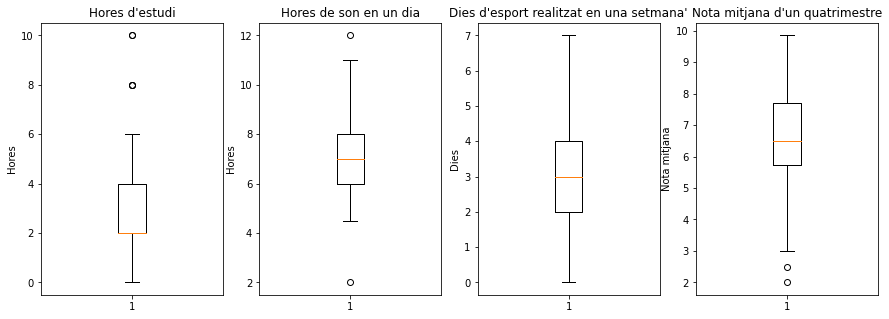

In [95]:
fig, ax = plt.subplots(1, 4, figsize = (15,5)) 
#ax.set_title('Comparación de algoritmos')
ax[0].boxplot(df['hores_estudi'])
ax[0].set_title("Hores d'estudi")
ax[0].set_ylabel("Hores")

ax[1].boxplot(df['hores_son'])
ax[1].set_title("Hores de son en un dia")
ax[1].set_ylabel("Hores")

ax[2].boxplot(df['dies_esport'])
ax[2].set_title("Dies d'esport realitzat en una setmana'")
ax[2].set_ylabel("Dies")

ax[3].boxplot(df['nota'])
ax[3].set_title("Nota mitjana d'un quatrimestre")
ax[3].set_ylabel("Nota mitjana")
plt.show()

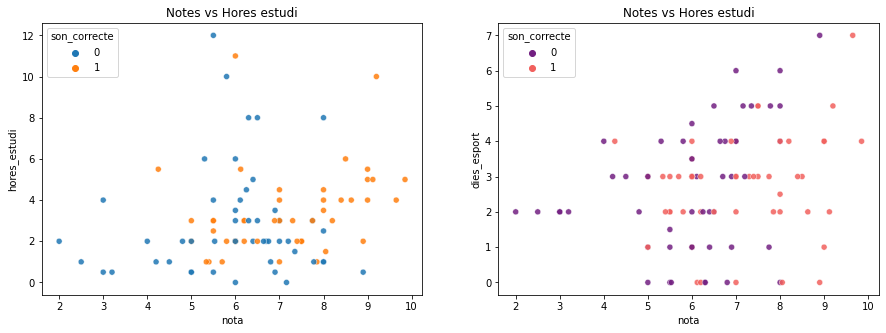

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15,5)) 
sns.scatterplot(ax = ax[0],data= df, x='nota', y='hores_estudi',hue='son_correcte',alpha =0.85).set_title("Notes vs Hores estudi")
sns.scatterplot(ax = ax[1],data= df, x='nota', y='dies_esport',hue='son_correcte',alpha =0.85,palette='magma').set_title("Notes vs Hores estudi")
plt.show()

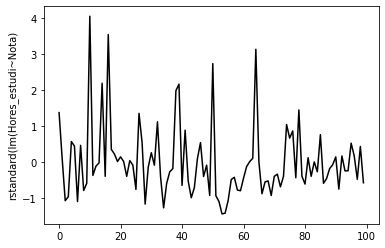

In [70]:
x = (1.3705347822,  0.1020047691, -1.0774926867, -0.9653024568,  0.5664537087,  0.4403847313, -1.0977223586,  0.4614172736, 
 -0.7919983291, -0.5925064450,  4.0480390501, -0.3744536654, -0.1172193576, -0.0260576169,  2.1869834408, -0.3998314877 ,
 3.5395710777,  0.3476313993,  0.2206551471,  0.0122939577 , 0.1415727639 , 0.0122939577 ,-0.3998314877 , 0.0378799085 ,
-0.0900132194, -0.7624346169,  1.3510140969,  0.5404530226, -1.1711287205 ,-0.1459465427 , 0.2567356065, -0.0900132194 ,
 1.1165371749, -0.3998314877, -1.2752542800, -0.5925064450, -0.2731364823 ,-0.1864308681 , 1.9784918212,  2.1611642640 ,
-0.6510719136,  0.8826618062, -0.5276578381, -0.9941158645, -0.7150206885 , 0.0930282462 , 0.5362546046, -0.4039256241 ,
-0.0900132194, -0.9326296281,  2.7326318950, -0.9394325530, -1.0977223586 ,-1.4437852571 ,-1.4239390456, -1.0681002201 ,
-0.4890946128, -0.4252544953, -0.7796480929 ,-0.7998744505, -0.4507356009 ,-0.1284806405 , 0.0089123694 , 0.1020047691 ,
 3.1291420321, -0.0004919070, -0.8846975446, -0.5535023040, -0.5276578381 ,-0.9326296281 ,-0.3998314877, -0.3402424698 ,
-0.6909565426, -0.3998314877,  1.0392097095 , 0.6621797387,  0.8616455443 ,-0.4385336058 , 1.4443817032, -0.3998314877 ,
-0.6141321906  ,0.1169826296, -0.3998314877  ,0.0009255628, -0.2731364823  ,0.7578677838, -0.5925064450, -0.4635019931 ,
-0.1864308681 ,-0.0759310043,  0.1404319607 ,-0.7549704145,  0.1665256148 ,-0.2477909375 ,-0.2448177729,  0.5214050762 ,
 0.1697757804, -0.4814078992 , 0.4308264402, -0.5794711074 )
plt.plot(x,color='black')
plt.ylabel('rstandard(lm(Hores_estudi~Nota)')
plt.title()
plt.show()

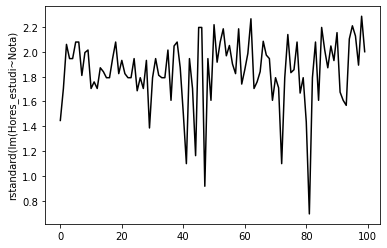

In [34]:
x = (1.446920,1.704750,2.060510,1.945910,1.945910,2.079440,2.079440,1.809930,1.994700,2.014900,1.704750,1.757860,1.704750,1.871800,1.840550,1.791760,1.791760,1.945910,
2.079440,1.824550,1.931520,1.824550,1.791760,1.791760,1.945910,1.686400,1.791760,1.704750,1.931520,1.386290,1.791760,1.945910,1.811560,
1.791760,1.791760,2.014900,1.609440,2.047690,2.079440,1.871800,1.504080,1.098610,1.945910,1.704750,1.163150,2.197220,2.197220,0.916291,1.945910,1.609440,2.219200,1.916920,2.079440,2.186050,1.968510,2.051560,
1.902110,1.824550,2.186050,1.740470,1.856300,1.987870,2.266960,1.704750,1.757860,1.840550,2.085670,1.974080,1.945910,1.609440,1.791760,1.710190,1.098610,1.791760,2.140070,1.832580,
1.856300,2.079440,1.667710,1.791760,1.435080,0.693147,1.791760,2.079440,1.609440,2.197220,2.014900,
1.871800,2.047690,1.930070,2.155240,1.675230,1.609440,1.568620,2.104130,2.210470,2.128230,
1.893110,2.287470,2.001480)
plt.plot(x,color='black')
plt.ylabel('rstandard(lm(Hores_estudi~Nota)')
plt.show()